In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from dateutil import parser
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
merged_data = pd.read_csv('merged_data.csv')

In [ ]:
print(merged_data)

            Date  tempmax  tempmin  temp  humidity    prcp    Minimum  \
0     01-06-2013     26.1     20.2  22.6      89.0  20.000  21.272727   
1     02-06-2013     27.0     20.1  22.8      84.7   5.000  21.272727   
2     03-06-2013     27.1     19.9  22.5      83.3   4.000  21.272727   
3     04-06-2013     28.6     19.9  24.0      75.9   0.000  21.272727   
4     05-06-2013     30.0     21.0  25.2      73.1   0.000  21.272727   
...          ...      ...      ...   ...       ...     ...        ...   
3832  28-11-2023     27.9     20.4  23.7      80.3   0.200  15.000000   
3833  29-11-2023     27.9     21.1  23.7      80.8   0.019   5.000000   
3834  30-11-2023     28.9     20.1  23.4      80.8   0.100  15.000000   
3835  01-12-2023     27.8     20.1  23.6      80.5   0.013  28.000000   
3836  02-12-2023     27.8     19.2  23.2      80.5   0.700  20.000000   

      Maximum    Average  
0        26.0  23.636364  
1        26.0  23.636364  
2        26.0  23.636364  
3        26.0  

In [ ]:
date = merged_data['Date']
precipitation = merged_data[' prcp']
price = merged_data['Average']

In [ ]:

merged_data['Date'] = pd.to_datetime(merged_data['Date'])

<ipython-input-7-ead1b8c69bc7>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_data['Date'] = pd.to_datetime(merged_data['Date'])


In [ ]:
features = merged_data[[' prcp', 'tempmin', 'tempmax', 'temp', 'Minimum', 'Maximum']]
target = merged_data['Average']

In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
96/96 [==============================] - 5s 7ms/step - loss: 1713.5912 - val_loss: 1725.1348
Epoch 2/50
96/96 [==============================] - 0s 4ms/step - loss: 1566.3879 - val_loss: 1462.2970
Epoch 3/50
96/96 [==============================] - 0s 4ms/step - loss: 1210.7703 - val_loss: 989.5007
Epoch 4/50
96/96 [==============================] - 0s 4ms/step - loss: 755.8788 - val_loss: 545.7092
Epoch 5/50
96/96 [==============================] - 0s 4ms/step - loss: 455.6150 - val_loss: 344.3150
Epoch 6/50
96/96 [==============================] - 0s 4ms/step - loss: 356.3693 - val_loss: 290.8324
Epoch 7/50
96/96 [==============================] - 0s 4ms/step - loss: 332.2156 - val_loss: 273.1393
Epoch 8/50
96/96 [==============================] - 0s 4ms/step - loss: 316.6783 - val_loss: 255.2567
Epoch 9/50
96/96 [==============================] - 0s 4ms/step - loss: 296.8170 - val_loss: 232.8365
Epoch 10/50
96/96 [==============================] - 0s 4ms/step - loss: 272.

In [ ]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print(f'Training Loss: {train_loss:.4f}')
print(f'Testing Loss: {test_loss:.4f}')

Training Loss: 40.0554
Testing Loss: 3.3877


In [ ]:
predictions = model.predict(X_test)

24/24 [==============================] - 1s 4ms/step


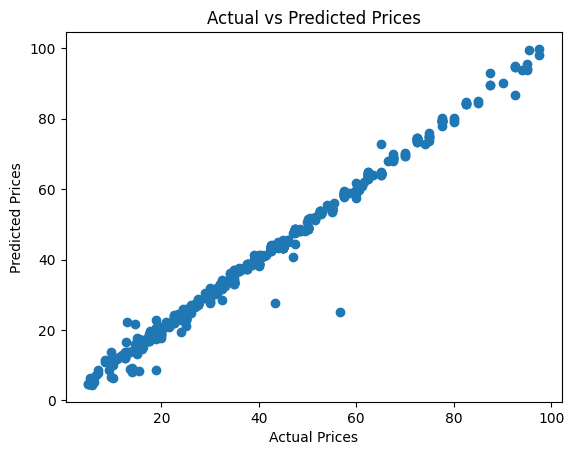

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [ ]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.3876744976319464


In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

R-squared: 0.9903414463019465
